In [1]:
%pylab inline
import random as rndm
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [42]:
#Potenciál fv
def V(x):
    return 0.5*x**2

#Energia fv
def E(x,n,eps,pot):
    sums=0
    for i in range(1,len(x)):
        sums+=(0.5+n)*((x[i]-x[i-1])/eps)**2 + pot((x[i]+x[i-1])/2)
        
    return sums

#Gauss fv (illesztéshez)
def Gauss(x,a,b,c):
    return a*exp(-(x-b)**2/(2*c**2))

In [3]:
#Paraméterek és változók
steps = 100_000
N = 100
n = 1
eps = 1
path = zeros(N)
prob = zeros(N)
E1 = E(path,n,eps,V)

In [4]:
def pog(steps,N,n,eps,path,prob,E1,pot):
    c = 1
    while c <= steps:
        elem = int (N*rndm.random())
        change = 2*(rndm.random()-0.5)
    #Ezek alapján frissítjük az utat és
    #újra számoljuk az energiát
        path[elem] += change
        E2 = E(path,n,eps,pot)

    #ha az új energia nagyobb mint ez előző ÉS
    #a valószínűség kisebb egy random számnál 0 és 1 között,
    #akkor nem változtatunk.
        if E2 > E1 and exp(-E2+E1) <= rndm.random():
            path[elem] -= change
    #Így ha a path épp 0 lenne, akkor sem lesz
    #mert hozzá adunk 50-et
        elem = int(path[elem]*16 + 50);
        if elem < 0:
            elem = 0
        if elem >= N:
            elem = N-1
        prob[elem] += 1
        E1 = E2

        c+=1
    prob = prob/max(prob)
    return path,prob

In [5]:
path1,prob1 = pog(steps,N,n,eps,path,prob,E1,V)

In [6]:
pos = range(int(-N/2),int(N/2),1)
popt, pcov = curve_fit(Gauss,pos,prob1)
perr = sqrt(diag(pcov))

In [7]:
steppot = V(array(pos))
steppot = steppot/max(steppot)

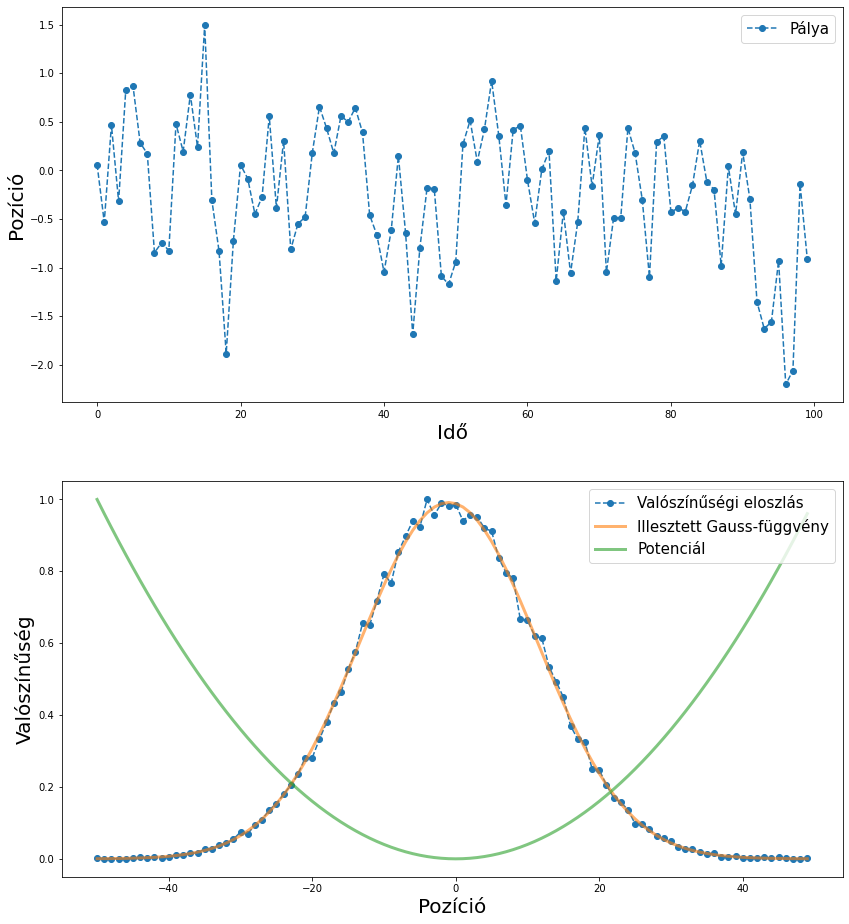

In [8]:
figsize(14,16)
subplot(2,1,1)
plot(path1,marker='o',ls='--',label='Pálya')
xlabel('Idő',fontsize=20)
ylabel('Pozíció',fontsize=20)
legend(fontsize=15)

subplot(2,1,2)
plot(pos,prob1,marker='o',ls='--',label='Valószínűségi eloszlás')
plot(pos,Gauss(pos,*popt),lw=3,alpha=0.6,label='Illesztett Gauss-függvény')
plot(pos,steppot,lw=3,alpha=0.6,label='Potenciál')
xlabel('Pozíció',fontsize=20)
ylabel('Valószínűség',fontsize=20)
legend(fontsize=15)

## FONTOS: Az ábrákon a potenciálokat csak reprezentatív okokból rajzoltuk be. A tengelyek leolvasásából ennek világosnak is kell lennie.

In [9]:
print('Illesztett paraméterek:\n',*popt)
print('\nIllesztés hibája:\n',*perr)

Illesztett paraméterek:
 0.9914635579485831 -0.9884722150892785 12.418451805823944

Illesztés hibája:
 0.0035884415853454396 0.05189996789075831 0.05190013749195986


# Potenciálok (3-4):

## Morse potenciál (anharmonikus) 

In [10]:
#some help I used:
#https://nbviewer.org/github/singletS/clueopen/blob/master/morse_potential/morse_numeric.ipynb
def Morse(x):
    D = 20
    a = 0.1
    r_e = 1
    return D*(1-exp(-a*(x-r_e)))**2

In [11]:
#Paraméterek és változók
N=160
path = zeros(N)
prob = zeros(N)
E1 = E(path,n,eps,Morse)

In [12]:
path1,prob1 = pog(steps,N,n,eps,path,prob,E1,Morse)

In [13]:
posM = range(-10,N-10,1)
posM2 = array(posM)+40
steppot = Morse(array(posM))
steppot = steppot-steppot[-1]
steppot = steppot/(max(steppot))

In [14]:
popt, pcov = curve_fit(Gauss,posM,prob1)
perr = sqrt(diag(pcov))
print('Illesztett paraméterek:\n',*popt)
print('\nIllesztés hibája:\n',*perr)

Illesztett paraméterek:
 0.9449972828285532 54.65706618450564 15.76947150256717

Illesztés hibája:
 0.004273455112996224 0.08234473340194685 0.08234479374410004


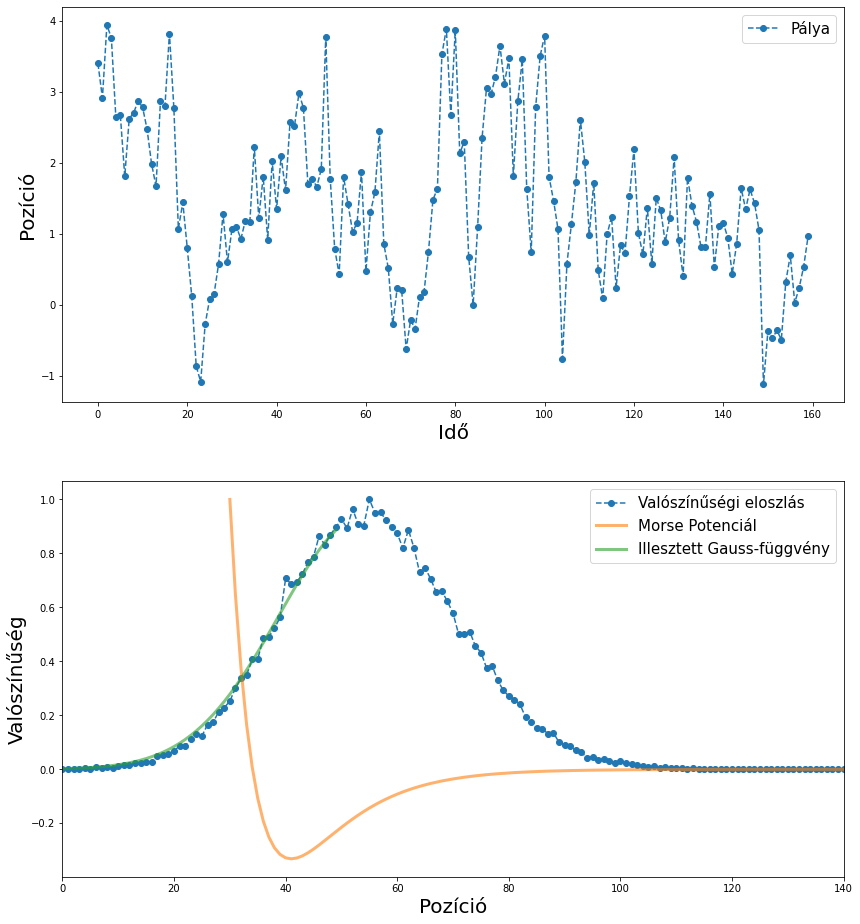

In [15]:
figsize(14,16)
subplot(2,1,1)
plot(path1,marker='o',ls='--',label='Pálya')
xlabel('Idő',fontsize=20)
ylabel('Pozíció',fontsize=20)
legend(fontsize=15)

subplot(2,1,2)
plot(posM[:],prob1[:],marker='o',ls='--',label='Valószínűségi eloszlás')
plot(posM2,steppot,lw = 3,alpha=0.6,label='Morse Potenciál')
plot(pos,Gauss(pos,*popt),lw=3,alpha=0.6,label='Illesztett Gauss-függvény')
xlim(0,140)
xlabel('Pozíció',fontsize=20)
ylabel('Valószínűség',fontsize=20)
legend(fontsize=15)

**végülis azon a felén kisebb a potenciál :D**

## Step potential (Töréses potenciál)

In [45]:
def step(x):
    if x<0:
        return 0
    else:
        return 500 #=V0

In [46]:
#Paraméterek és változók
N=200
pos = range(int(-N/2),int(N/2),1)
path = zeros(N)
prob = zeros(N)
E1 = E(path,n,eps,step)

In [47]:
path1,prob1 = pog(steps,N,n,eps,path,prob,E1,step)

In [48]:
steppot = zeros(len(prob1))
steppot[51:] = max(prob1[1:])

In [49]:
popt, pcov = curve_fit(Gauss,pos,prob1)
perr = sqrt(diag(pcov))
print('Illesztett paraméterek:\n',*popt)
print('\nIllesztés hibája:\n',*perr)

Illesztett paraméterek:
 0.008169597560664581 0.9999999979175832 0.1563754791860934 -17.781272994481576

Illesztés hibája:
 763384196.9658301 9538.4359448273 87135720590.4248 nan


C:\Users\csaba\AppData\Local\Temp/ipykernel_16752/3285942891.py:2: RuntimeWarning: invalid value encountered in sqrt
  perr = sqrt(diag(pcov))


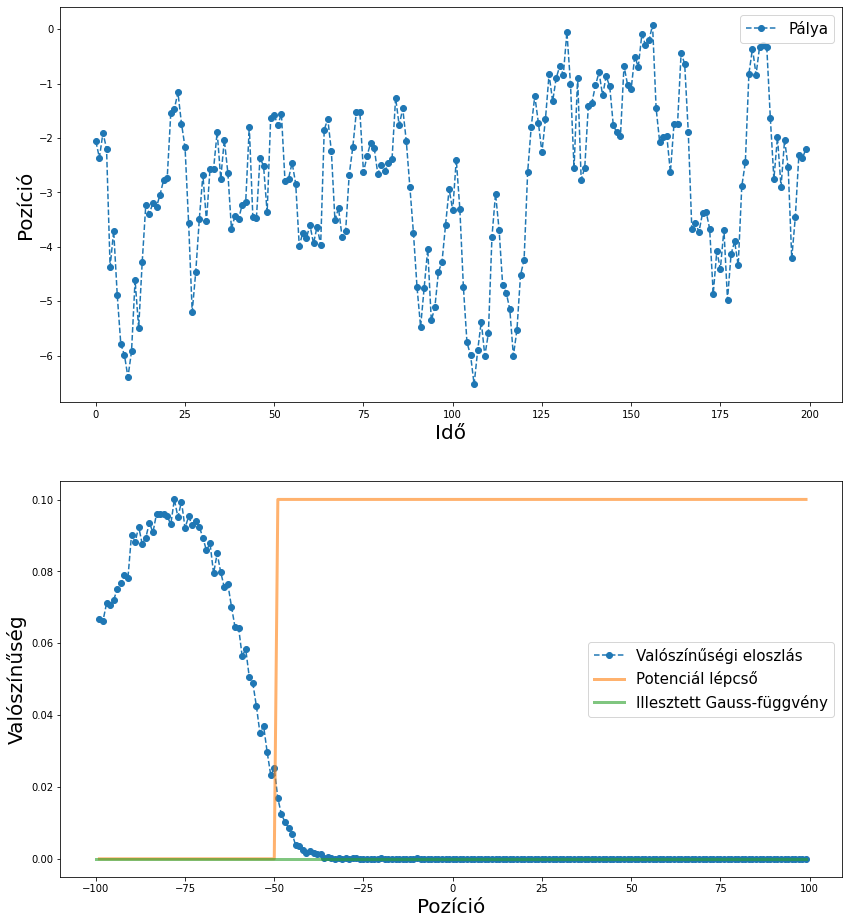

In [50]:
figsize(14,16)
subplot(2,1,1)
plot(path1,marker='o',ls='--',label='Pálya')
xlabel('Idő',fontsize=20)
ylabel('Pozíció',fontsize=20)
legend(fontsize=15)

subplot(2,1,2)
plot(pos[1:],prob1[1:],marker='o',ls='--',label='Valószínűségi eloszlás')
plot(pos[1:],steppot[1:],lw = 3,alpha=0.6,label='Potenciál lépcső')
plot(pos,Gauss(pos,*popt),lw=3,alpha=0.6,label='Illesztett Gauss-függvény')
xlabel('Pozíció',fontsize=20)
ylabel('Valószínűség',fontsize=20)
legend(fontsize=15)

# Rectangular potential

In [22]:
def Rec(x):
    if x>=0 and x<=10:
        return 500 #=V0
    else:
        return 0

In [23]:
#Paraméterek és változók
path = zeros(N)
prob = zeros(N)
E1 = E(path,n,eps,Rec)

In [24]:
path1,prob1 = pog(steps,N,n,eps,path,prob,E1,Rec)

In [25]:
steppot = zeros(len(prob1))
steppot[40:-40] = max(prob1[1:])

In [27]:
popt, pcov = curve_fit(Gauss,pos,prob1)
perr = sqrt(diag(pcov))
print('Illesztett paraméterek:\n',*popt)
print('\nIllesztés hibája:\n',*perr)

Illesztett paraméterek:
 -3.318509911309775e-10 0.9999999999999999 0.9999999995841465

Illesztés hibája:
 0.06740092658680728 235546019.971583 233437752.79867506


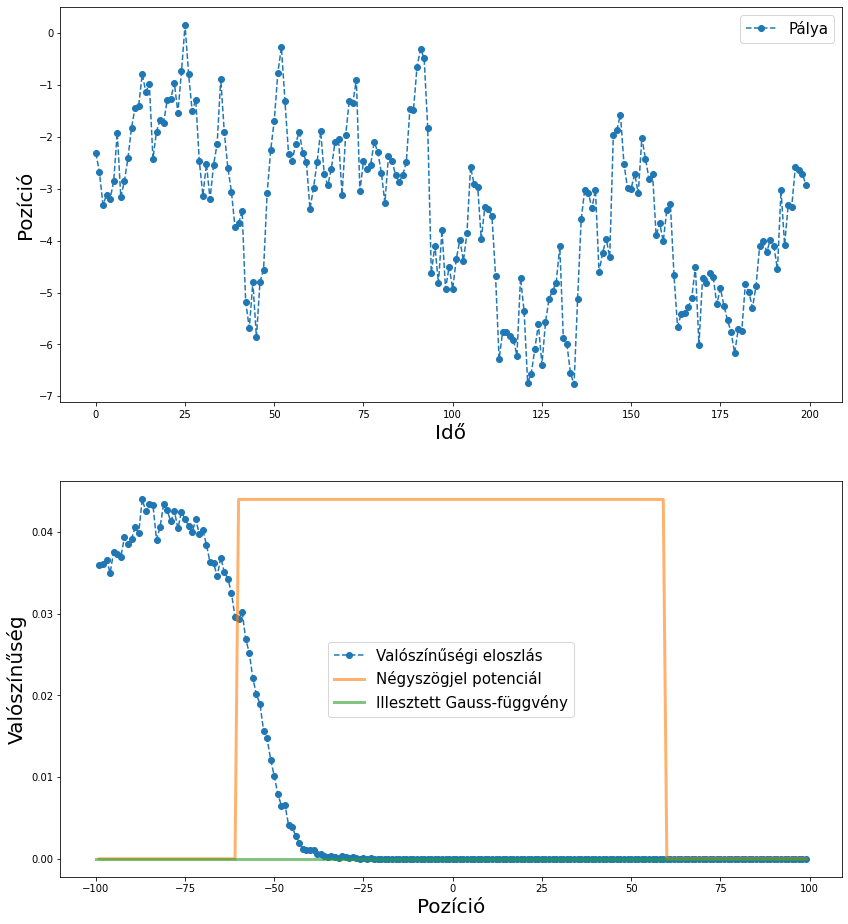

In [28]:
figsize(14,16)
subplot(2,1,1)
plot(path1,marker='o',ls='--',label='Pálya')
xlabel('Idő',fontsize=20)
ylabel('Pozíció',fontsize=20)
legend(fontsize=15)

subplot(2,1,2)
plot(pos[1:],prob1[1:],marker='o',ls='--',label='Valószínűségi eloszlás')
plot(pos[1:],steppot[1:],lw = 3,alpha=0.6,label='Négyszögjel potenciál')
plot(pos,Gauss(pos,*popt),lw=3,alpha=0.6,label='Illesztett Gauss-függvény')
xlabel('Pozíció',fontsize=20)
ylabel('Valószínűség',fontsize=20)
legend(fontsize=15)

# Rectangular well

In [29]:
def Recw(x):
    if x>=0 and x<=10:
        return -500 #=V0
    else:
        return 0

In [30]:
#Paraméterek és változók
path = zeros(N)
prob = zeros(N)
E1 = E(path,n,eps,Recw)

In [31]:
path1,prob1 = pog(steps,N,n,eps,path,prob,E1,Recw)

In [32]:
steppot = zeros(len(prob1))
steppot[:40] = max(prob1[1:-1])
steppot[-40:] = max(prob1[1:-1])
steppot[40:-40] = min(prob1[1:-1])

In [33]:
popt, pcov = curve_fit(Gauss,pos,prob1)
perr = sqrt(diag(pcov))
print('Illesztett paraméterek:\n',*popt)
print('\nIllesztés hibája:\n',*perr)

Illesztett paraméterek:
 0.9580216819400812 -18.56089305229612 21.778329674481405

Illesztés hibája:
 0.011158567247904146 0.29290792678365424 0.29291093531709883


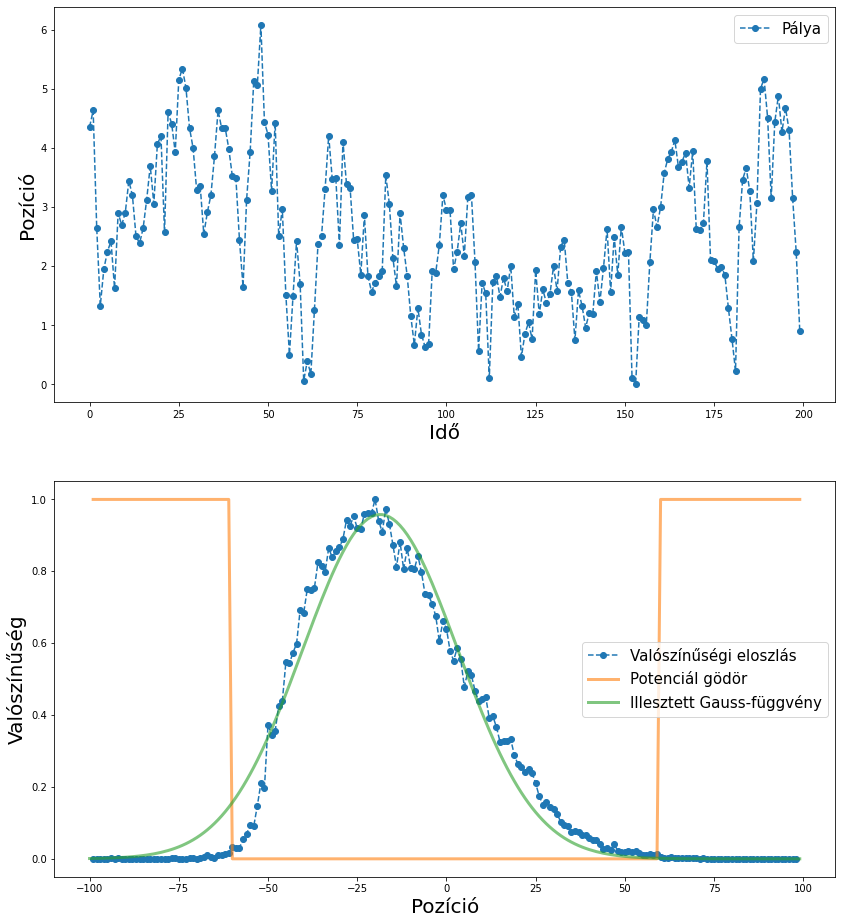

In [34]:
figsize(14,16)
subplot(2,1,1)
plot(path1,marker='o',ls='--',label='Pálya')
xlabel('Idő',fontsize=20)
ylabel('Pozíció',fontsize=20)
legend(fontsize=15)

subplot(2,1,2)
plot(pos[1:-1],prob1[1:-1],marker='o',ls='--',label='Valószínűségi eloszlás')
plot(pos[1:],steppot[1:],lw = 3,alpha=0.6,label='Potenciál gödör')
plot(pos,Gauss(pos,*popt),lw=3,alpha=0.6,label='Illesztett Gauss-függvény')
xlabel('Pozíció',fontsize=20)
ylabel('Valószínűség',fontsize=20)
legend(fontsize=15)

**Literálisan a simának az ellentetjét kaptuk.**

# Alagút effektus vizsgálata

In [35]:
def alag(x):
    if x<0 or x>0:
        return 0
    else:
        return 500 #=V0

In [36]:
#Paraméterek és változók
path = zeros(N)
prob = zeros(N)
E1 = E(path,n,eps,alag)

In [37]:
path1,prob1 = pog(steps,N,n,eps,path,prob,E1,alag)

In [38]:
steppot = zeros(len(prob1))
steppot[50] = max(prob1[1:-1])

In [40]:
popt, pcov = curve_fit(Gauss,pos,prob1)
perr = sqrt(diag(pcov))
print('Illesztett paraméterek:\n',*popt)
print('\nIllesztés hibája:\n',*perr)

Illesztett paraméterek:
 0.17285966009436682 -63.216113976044134 32.99892568960574

Illesztés hibája:
 0.01120867462687345 3.0215403647093995 3.35321732314156


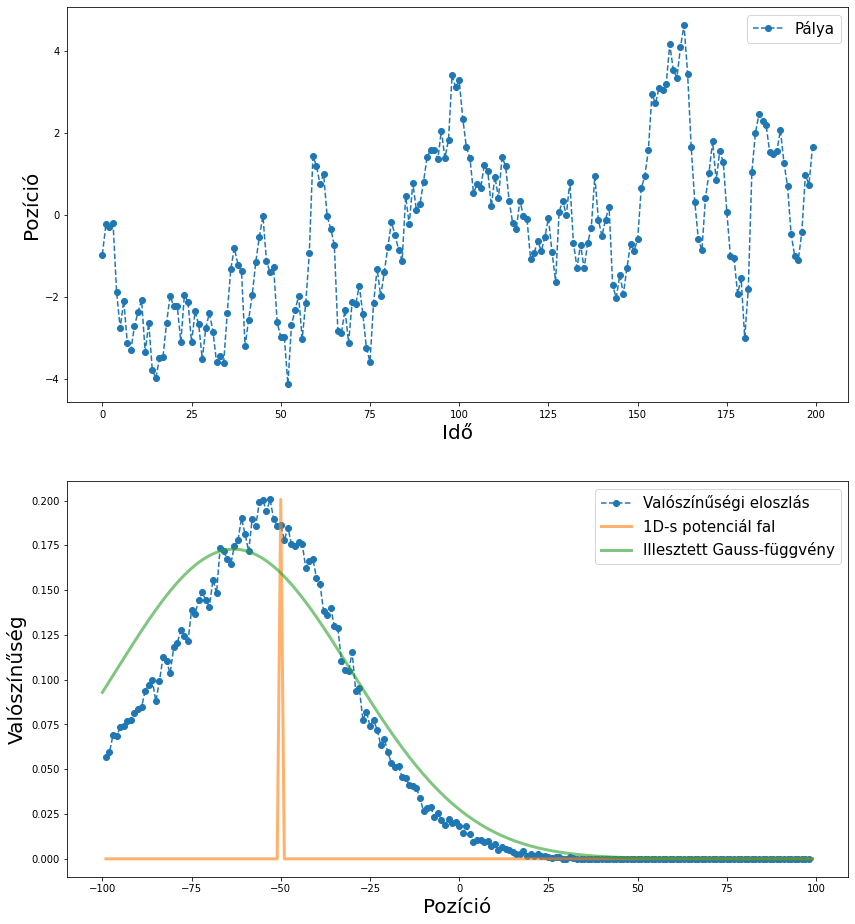

In [41]:
figsize(14,16)
subplot(2,1,1)
plot(path1,marker='o',ls='--',label='Pálya')
xlabel('Idő',fontsize=20)
ylabel('Pozíció',fontsize=20)
legend(fontsize=15)

subplot(2,1,2)
plot(pos[1:-1],prob1[1:-1],marker='o',ls='--',label='Valószínűségi eloszlás')
plot(pos[1:],steppot[1:],lw = 3,alpha=0.6,label='1D-s potenciál fal')
plot(pos,Gauss(pos,*popt),lw=3,alpha=0.6,label='Illesztett Gauss-függvény')
xlabel('Pozíció',fontsize=20)
ylabel('Valószínűség',fontsize=20)
legend(fontsize=15)

**Jól látszik ahogyan áthalad, de a mihez tartás végett a következőben végezzük el a szabad részecske útjára is a számításokat.**

# Szabad részecske

In [ ]:
def szabad(x):
    return 0

In [ ]:
#Paraméterek és változók
path = zeros(N)
prob = zeros(N)
E1 = E(path,n,eps,szabad)

In [ ]:
path1,prob1 = pog(steps,N,n,eps,path,prob,E1,szabad)

In [ ]:
popt, pcov = curve_fit(Gauss,posM,prob1)
perr = sqrt(diag(pcov))
print('Illesztett paraméterek:\n',*popt)
print('\nIllesztés hibája:\n',*perr)

In [ ]:
figsize(14,16)
subplot(2,1,1)
plot(path1,marker='o',ls='--',label='Pálya')
xlabel('Idő',fontsize=20)
ylabel('Pozíció',fontsize=20)
legend(fontsize=15)

subplot(2,1,2)
plot(pos[1:-1],prob1[1:-1],marker='o',ls='--',label='Valószínűségi eloszlás')
plot(pos,Gauss(pos,*popt),lw=3,alpha=0.6,label='Illesztett Gauss-függvény')
xlabel('Pozíció',fontsize=20)
ylabel('Valószínűség',fontsize=20)
legend(fontsize=15)